# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib

# Loading Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/thanhdatho0/BTL_Data_Mining/main/spotify_churn_dataset.csv')
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [ ]:
# set index cho dataset bằng thuộc tính user_id
df.set_index(df.user_id, inplace=True)
df.drop('user_id', inplace=True, axis=1) # drop cột user_id
df.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
user_id,,,,,,,,,,,
1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


# Features Classification: Categorical vs Numerical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 1 to 8000
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8000 non-null   object 
 1   age                    8000 non-null   int64  
 2   country                8000 non-null   object 
 3   subscription_type      8000 non-null   object 
 4   listening_time         8000 non-null   int64  
 5   songs_played_per_day   8000 non-null   int64  
 6   skip_rate              8000 non-null   float64
 7   device_type            8000 non-null   object 
 8   ads_listened_per_week  8000 non-null   int64  
 9   offline_listening      8000 non-null   int64  
 10  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 750.0+ KB


In [ ]:
# Thay đổi kiểu dữ liệu của target feature thành categorical, nhận 2 giá trị {0,1}
df['is_churned'] = df['is_churned'].astype('category')

# for loop chuyển đổi kiểu dữ liệu
features = ['gender', 'country', 'subscription_type', 'device_type', 'offline_listening']
for feature in features:
    df[feature] = df[feature].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 1 to 8000
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 8000 non-null   category
 1   age                    8000 non-null   int64   
 2   country                8000 non-null   category
 3   subscription_type      8000 non-null   category
 4   listening_time         8000 non-null   int64   
 5   songs_played_per_day   8000 non-null   int64   
 6   skip_rate              8000 non-null   float64 
 7   device_type            8000 non-null   category
 8   ads_listened_per_week  8000 non-null   int64   
 9   offline_listening      8000 non-null   category
 10  is_churned             8000 non-null   category
dtypes: category(6), float64(1), int64(4)
memory usage: 422.9 KB


In [ ]:
# Sự phân bổ của các numerical feature
df.describe()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,37.662125,154.068250,50.127250,0.300127,6.943875
std,12.740359,84.015596,28.449762,0.173594,13.617953
min,16.000000,10.000000,1.000000,0.000000,0.000000
25%,26.000000,81.000000,25.000000,0.150000,0.000000
50%,38.000000,154.000000,50.000000,0.300000,0.000000
75%,49.000000,227.000000,75.000000,0.450000,5.000000
max,59.000000,299.000000,99.000000,0.600000,49.000000


In [ ]:
# Sự phân bổ của các categorical feature
df.describe(include=['category'])

,gender,country,subscription_type,device_type,offline_listening,is_churned
count,8000,8000,8000,8000,8000,8000
unique,3,8,4,3,2,2
top,Male,AU,Premium,Desktop,1,0
freq,2691,1034,2115,2778,5982,5929


# Exploratry Data Analysis (EDA)

## EDA for categorical features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['is_churned'].value_counts(normalize=True).to_frame()

,proportion
is_churned,
0,0.741125
1,0.258875


* Bộ dữ liệu tương đối mất cân bằng với tỉ lệ ~26/74

In [ ]:
df['gender'].value_counts(normalize=True).to_frame()

,proportion
gender,
Male,0.336375
Female,0.332375
Other,0.331250


* Các giá trị trong thuộc tính age được phân bổ khá đồng đều

In [ ]:
df['country'].value_counts(normalize=True).to_frame()

,proportion
country,
AU,0.129250
US,0.129000
DE,0.126875
IN,0.126375
PK,0.124875
FR,0.123625
UK,0.120750
CA,0.119250


* Các giá trị trong thuộc tính country được phân bổ khá đồng đều

In [ ]:
df['subscription_type'].value_counts(normalize=True).to_frame()

,proportion
subscription_type,
Premium,0.264375
Free,0.252250
Student,0.244875
Family,0.238500


* Sự phân bố giá trị ở thuộc tính subscription_type có sự chênh lệch nhưng không đáng kể

In [ ]:
df['device_type'].value_counts(normalize=True).to_frame()

,proportion
device_type,
Desktop,0.347250
Web,0.327875
Mobile,0.324875


* Sự phân bố giá trị của thuộc tính dedive_type khá đồng đều, có hơi nhiều hơn về phía Desktop nhưng nhìn chung không đáng kể

In [ ]:
df['offline_listening'].value_counts(normalize=True).to_frame()

,proportion
offline_listening,
1,0.74775
0,0.25225


* Sự phân bố giá trị của thuộc tính offline_listening có sự chênh lệch rõ ràng với tỉ lệ 25(0)/75(1)

## EDA for numerical features

<Axes: xlabel='age', ylabel='Count'>

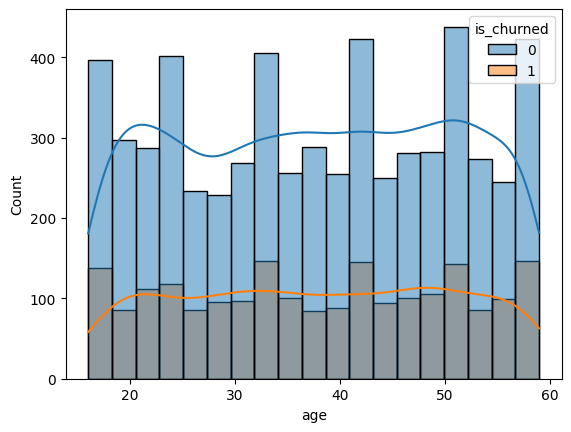

In [ ]:
sns.histplot(x="age", hue='is_churned', data=df, kde=True)

<Axes: xlabel='listening_time', ylabel='Count'>

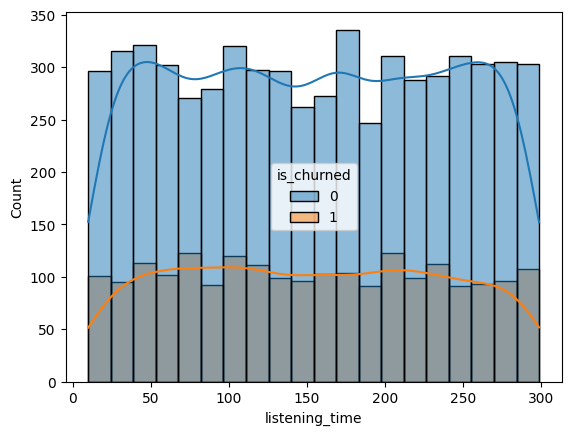

In [ ]:
sns.histplot(x="listening_time", hue='is_churned', data=df, kde=True)

<Axes: xlabel='songs_played_per_day', ylabel='Count'>

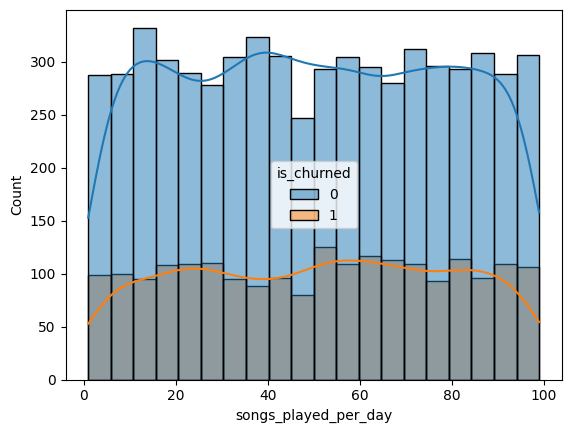

In [ ]:
sns.histplot(x="songs_played_per_day", hue='is_churned', data=df, kde=True)

<Axes: xlabel='skip_rate', ylabel='Count'>

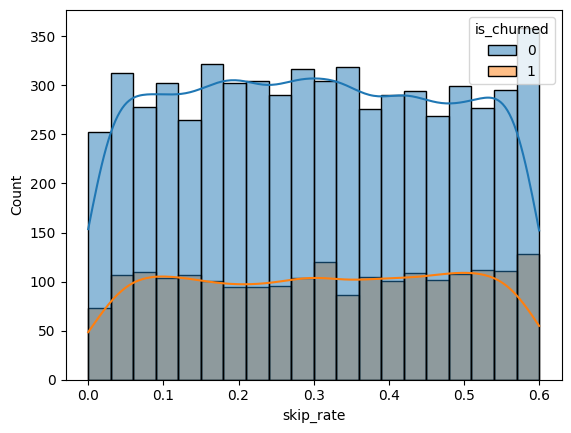

In [ ]:
sns.histplot(x="skip_rate", hue='is_churned', data=df, kde=True)

<Axes: xlabel='ads_listened_per_week', ylabel='Count'>

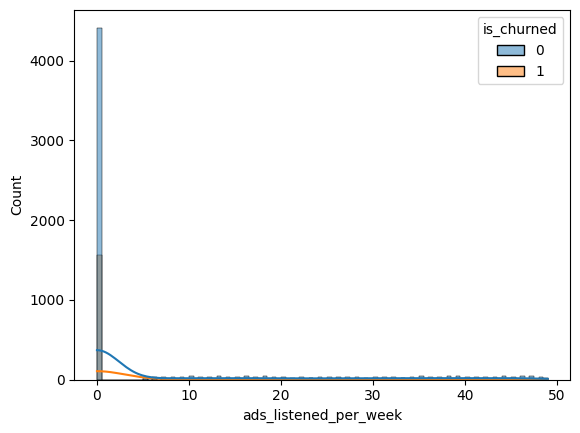

In [ ]:
sns.histplot(x="ads_listened_per_week", hue='is_churned', data=df, kde=True)

# Feature Engineering & Data Wrangling

# Feature Engineering

In [ ]:
print(df.groupby('subscription_type')['ads_listened_per_week'].describe())

                    count      mean        std  min   25%   50%   75%   max
subscription_type                                                          
Family             1908.0   0.00000   0.000000  0.0   0.0   0.0   0.0   0.0
Free               2018.0  27.52775  12.982368  5.0  16.0  28.0  39.0  49.0
Premium            2115.0   0.00000   0.000000  0.0   0.0   0.0   0.0   0.0
Student            1959.0   0.00000   0.000000  0.0   0.0   0.0   0.0   0.0


/tmp/ipython-input-3605340771.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('subscription_type')['ads_listened_per_week'].describe())


In [ ]:
df['ads_listened_per_week_fequences'] = pd.cut(df['ads_listened_per_week'], bins=[-1,4,20,35,50], labels=['Never', 'Sometimes', 'Often', 'Always'])

In [ ]:
df['ads_listened_per_week_fequences']

,ads_listened_per_week_fequences
user_id,
1,Often
2,Never
3,Never
4,Never
5,Never
...,...
7996,Never
7997,Never
7998,Sometimes


<Axes: xlabel='ads_listened_per_week_fequences', ylabel='Count'>

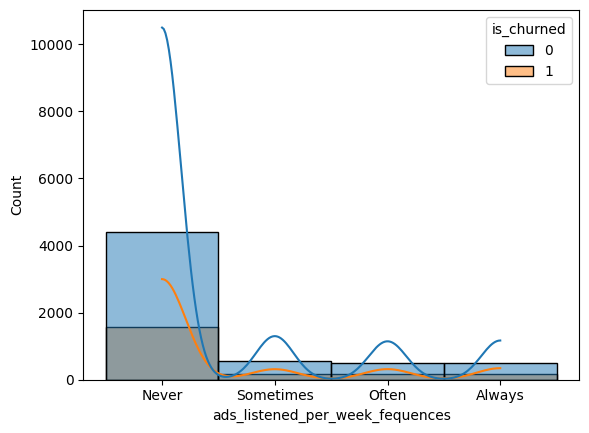

In [ ]:
sns.histplot(x="ads_listened_per_week_fequences", hue='is_churned', data=df, kde=True)

# Data Wrangling

In [ ]:
num_features = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week']
cat_features = ['gender', 'country', 'subscription_type', 'device_type', 'offline_listening', 'ads_listened_per_week_fequences']

feature_cols = num_features + cat_features
print(feature_cols)

['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'gender', 'country', 'subscription_type', 'device_type', 'offline_listening', 'ads_listened_per_week_fequences']


In [ ]:
def display_missing(df, feature_cols):
  n_rows = df.shape[0]
  for col in feature_cols:
    missing_count = df[col].isnull().sum()
    if(missing_count > 0):
      print(f"Col {col} has {missing_count*100/n_rows:.2f}% missing values")

display_missing(df, feature_cols)

* Không có missing values

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop('is_churned', axis=1)
y = df['is_churned']

print("Features (X):", X.shape)
print("Target (y):", y.shape)

Features (X): (8000, 11)
Target (y): (8000,)


In [ ]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [ ]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'listening_time',
                                  'songs_played_per_day', 'skip_rate',
                                  'ads_listened_per_week']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'country', 'subscription_type',
                                  'device_type', 'offline_listening',
                                  'ads_listened_per_week_fequences'])])

In [ ]:
X = preprocessor.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # Định nghĩa base model
# svm_base = SVC(random_state=42, class_weight='balanced')  # Balanced cho imbalance

# # Param grid cho non-linear SVM (tập trung rbf/poly/sigmoid; C chi tiết như grid trước)
# param_grid = {
#     'C': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Regularization chi tiết
#     'kernel': ['rbf', 'poly', 'sigmoid'],         # Non-linear kernels: rbf thường tốt nhất cho Titanic
#     'gamma': ['scale', 'auto'],                   # Cho rbf/poly; sigmoid ít dùng gamma nhưng vẫn tune
#     'degree': [2, 3]                              # Cho poly: bậc 2-3 cho tương tác đơn giản
# }

# # GridSearchCV (cv=5, scoring='accuracy'; grid lớn ~11x3x2x2=132 combos x5=~660 fits, có thể chậm ~2-5p)
# grid_search = GridSearchCV(
#     svm_base, param_grid, cv=5, scoring='accuracy', n_jobs=-1  # n_jobs=-1 dùng tất cả CPU
# )
# grid_search.fit(X_train, y_train)  # Fit trên scaled data

# # Best model sau tune
# svm_nonlinear_classifier = grid_search.best_estimator_
# print("Best params:", grid_search.best_params_)
# print("Best CV score:", grid_search.best_score_)

# # Predict và evaluate trên val (cũng scale)
# y_pred = svm_nonlinear_classifier.predict(X_test)
# print(classification_report(y_test, y_pred))

In [ ]:
# Định nghĩa class Perceptron
class Perceptron:
    def __init__(self, n_iterations=100):
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def hardlim(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Khởi tạo trọng số và bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Huấn luyện
        for _ in range(self.n_iterations):
            for i in range(n_samples):
                xi = X[i]
                target = y.iloc[i] # Access target by integer position

                # Tính đầu ra
                a = self.hardlim(np.dot(xi, self.weights) + self.bias) # a = (hardlim(W*p_i + b))

                # Cập nhật trọng số và bias dựa trên lỗi
                error = target - a
                if error != 0:
                    self.weights += error * xi # W_new = W_old + (t_i - a)*p_i
                    self.bias += error # b_new = b_old + (t_i - a)

    def predict(self, X):
        return np.array([self.hardlim(np.dot(x, self.weights) + self.bias) for x in X])


perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# 5. Dự đoán và đánh giá
y_pred = perceptron.predict(X_test)

# 6. In kết quả
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83      1200
           1       0.21      0.05      0.08       400

    accuracy                           0.71      1600
   macro avg       0.48      0.49      0.46      1600
weighted avg       0.61      0.71      0.64      1600

